<a href="https://colab.research.google.com/github/kinetiz/ANN-from-scratch/blob/master/purchase_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
data = pd.read_csv("customer_purchase.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 8 columns):
User_ID                       537577 non-null int64
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(4), object(4)
memory usage: 32.8+ MB


In [0]:
# change data types
data['User_ID'] = data['User_ID'].astype(object)
data['Occupation'] = data['Occupation'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 8 columns):
User_ID                       537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null object
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(2), object(6)
memory usage: 32.8+ MB


In [0]:
# ====== explore data
for c in data.columns:
    print(c)
    print(data[c].unique())

User_ID
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
Gender
['F' 'M']
Age
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation
[10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]
City_Category
['A' 'C' 'B']
Stay_In_Current_City_Years
['2' '4+' '3' '1' '0']
Marital_Status
[0 1]
Purchase
[ 8370 15200  1422 ... 14539 11120 18426]


In [0]:
# ====== prep data
data.Age.replace({
        '0-17':  17,
        '18-25': 25,
        '26-35': 35,
        '36-45': 45,
        '46-50': 50,
        '51-55': 55,
        '55+': 60
    }, inplace=True)

data.Stay_In_Current_City_Years.replace({
        '0': 0,
        '1': 1,
        '2': 2,
        '3': 3,
        '4+': 4, #-> data for 4+ is not a lot, so just change to 4 should be ok
        }, inplace=True)
    
data.Gender.replace({
        'F': 0,
        'M': 1
        }, inplace=True)

In [0]:
# check 
data.Age.unique()
data.Stay_In_Current_City_Years.unique()    
data.Gender.unique()

sample = data.head()
data.info()

data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 8 columns):
User_ID                       537577 non-null object
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null object
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(5), object(3)
memory usage: 32.8+ MB


Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase'],
      dtype='object')

In [0]:
# verify if userid have non-duplicate infomation
cnt_gby_uid = data.groupby(['User_ID'])['Purchase'].sum().count()
cnt_gby_infos = data.groupby(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status'])['Purchase'].sum().count()
print('Does UID and info match?'); print((cnt_gby_uid == cnt_gby_infos) )
user_purchase = data.groupby(['User_ID'])['Purchase'].sum()
datauni = data.drop_duplicates(['User_ID'])

Does UID and info match?
True


In [0]:
# prep total purchase
pd.concat([datauni,user_purchase],ignore_index=True)
datauni['total_purchase'] = user_purchase.values
datatotal = datauni.drop(['Purchase'], axis=1)
datatotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 0 to 243533
Data columns (total 8 columns):
User_ID                       5891 non-null object
Gender                        5891 non-null int64
Age                           5891 non-null int64
Occupation                    5891 non-null object
City_Category                 5891 non-null object
Stay_In_Current_City_Years    5891 non-null int64
Marital_Status                5891 non-null int64
total_purchase                5891 non-null int64
dtypes: int64(5), object(3)
memory usage: 414.2+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
# encode occupation
occups = pd.get_dummies(datatotal.Occupation,drop_first=True)
occups.columns= ['occup'+str(i) for i in occups.columns]
datatotal_enc = pd.concat([datatotal.drop(['Occupation'],axis=1),occups],axis=1)
datatotal_enc

,User_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,total_purchase,occup1,occup2,occup3,...,occup11,occup12,occup13,occup14,occup15,occup16,occup17,occup18,occup19,occup20
0,1000001,0,17,A,2,0,333481,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000002,1,60,C,4,0,810353,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1000003,1,35,A,3,0,341635,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1000004,1,50,B,2,1,205987,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1000005,1,35,A,1,1,821001,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,1000006,0,55,A,1,0,379450,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,1000007,1,45,B,1,1,234427,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1000008,1,35,C,4,1,796545,0,0,0,...,0,1,0,0,0,0,0,0,0,0
25,1000009,1,35,C,0,0,593960,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29,1000010,0,45,B,4,1,2169486,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# encode city
city_cat = pd.get_dummies(datatotal.City_Category, drop_first = True)
city_cat.columns=['citycat1','citycat2']
city_cat.head()
datatotal_enc = pd.concat([datatotal_enc.drop(['City_Category'],axis=1), city_cat] , axis=1)


In [0]:
# rename columns
datatotal_enc = datatotal_enc.rename(index=str, columns={'B':'city_cat1','C':'city_cat2'})
datatotal_enc.head()

,User_ID,Gender,Age,Stay_In_Current_City_Years,Marital_Status,total_purchase,occup1,occup2,occup3,occup4,...,occup13,occup14,occup15,occup16,occup17,occup18,occup19,occup20,citycat1,citycat2
0,1000001,0,17,2,0,333481,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000002,1,60,4,0,810353,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,1000003,1,35,3,0,341635,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1000004,1,50,2,1,205987,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1000005,1,35,1,1,821001,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 0 to 243533
Data columns (total 28 columns):
User_ID                       5891 non-null object
Gender                        5891 non-null int64
Age                           5891 non-null int64
Stay_In_Current_City_Years    5891 non-null int64
Marital_Status                5891 non-null int64
total_purchase                5891 non-null int64
occup1                        5891 non-null uint8
occup2                        5891 non-null uint8
occup3                        5891 non-null uint8
occup4                        5891 non-null uint8
occup5                        5891 non-null uint8
occup6                        5891 non-null uint8
occup7                        5891 non-null uint8
occup8                        5891 non-null uint8
occup9                        5891 non-null uint8
occup10                       5891 non-null uint8
occup11                       5891 non-null uint8
occup12                       5891 non-null u

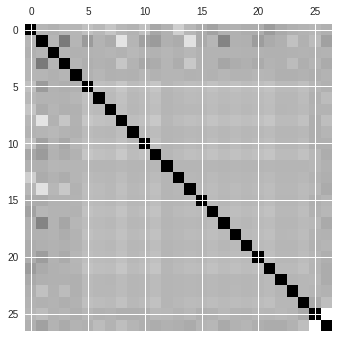

In [0]:
# ============= check data behaviour
datatotal_enc.info()
# correlation matrix
plt.matshow(datatotal_enc.corr())

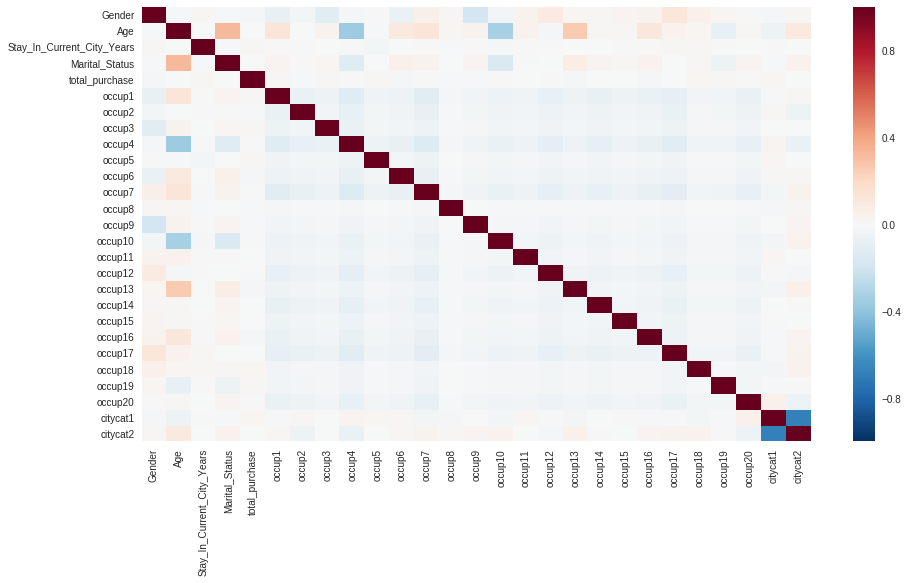

In [0]:
# or
import seaborn as sns
corr = datatotal_enc.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(30, 30, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=False)

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 0 to 243533
Data columns (total 28 columns):
User_ID                       5891 non-null object
Gender                        5891 non-null int64
Age                           5891 non-null int64
Stay_In_Current_City_Years    5891 non-null int64
Marital_Status                5891 non-null int64
total_purchase                5891 non-null int64
occup1                        5891 non-null uint8
occup2                        5891 non-null uint8
occup3                        5891 non-null uint8
occup4                        5891 non-null uint8
occup5                        5891 non-null uint8
occup6                        5891 non-null uint8
occup7                        5891 non-null uint8
occup8                        5891 non-null uint8
occup9                        5891 non-null uint8
occup10                       5891 non-null uint8
occup11                       5891 non-null uint8
occup12                       5891 non-null u

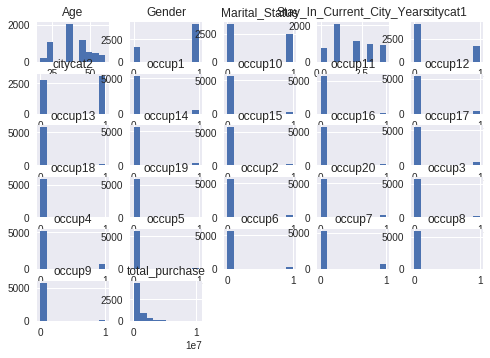

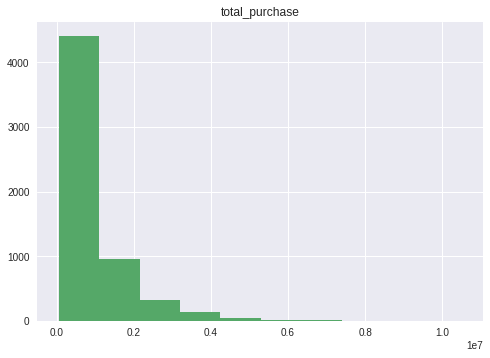

In [0]:
# check distribution
dataprep = datatotal_enc.drop(['User_ID'], axis=1)
datatotal_enc.info()
dataprep.hist()
datatotal_enc.total_purchase.to_frame().hist()
dataprep.total_purchase.hist()
dataprep.Age.hist()
dataprep.Gender.hist()

In [0]:
# ============= modeling
from sklearn import linear_model as lm
from sklearn.model_selection import cross_val_score
from sklearn import ensemble

# prep featuers and target
features = dataprep.drop('total_purchase',axis=1)
target = dataprep[['total_purchase']]

In [0]:
# create model
lrm = lm.LinearRegression()
lmscores = cross_val_score(lrm, features, target.values.flatten(), cv=5)
lmscores 

array([-0.00819619, -0.00577004, -0.01002159, -0.00814041, -0.02783864])

In [0]:
lasso = lm.Lasso()
lassoscore = cross_val_score(lasso, features, target.values.flatten(), cv=5)
lassoscore

array([-0.00819401, -0.00576905, -0.0100166 , -0.0081383 , -0.02782744])

In [0]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'}
gbt = ensemble.GradientBoostingRegressor(**params)
gbtscore = cross_val_score(gbt, features, target.values.flatten(), cv=5)
gbtscore

array([-0.02360941, -0.01198019, -0.02452751, -0.00974312, -0.08043659])

In [0]:
from sklearn.feature_selection import SelectFromModel
features.shape
fs_lasso = lasso.fit(features, target.values.flatten())
model = SelectFromModel(fs_lasso , prefit=True)
X_new = model.transform(features)
X_new.shape

(5891, 26)

In [0]:
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = lm.LassoCV(alphas=[0.1], cv=5)
a = clf.fit(features, target)
clf

In [0]:
# Set a minimum threshold
sfm = SelectFromModel(clf, threshold=0.0000001)
sfm.fit(features, target.values.flatten())
n_features = sfm.transform(features).shape[1]
n_features

26

In [0]:
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
round = 1
while n_features > 10:
    sfm.threshold += 0.05
    X_transform = sfm.transform(features)
    n_features = X_transform.shape[1]
    print("Round{0}:{1}".format(round, n_features))
    round +=1